# **경구약제 이미지 객체 검출 프로젝트: EDA**

## **1. 데이터 소개 및 분석 목적**

### **데이터 배경**

본 프로젝트에서 사용된 데이터는 **AI Hub에서 제공하는 경구약제 이미지 데이터셋**을 기반으로 가공된 것으로,  
**다양한 조명, 배경, 각도**에서 촬영된 **알약 이미지**들과, 해당 이미지에 존재하는 알약들의 **위치와 클래스 정보를 포함한 라벨(COCO JSON 형식)**로 구성되어 있습니다.

각 이미지는 **3~4개의 알약이 함께 등장하는 경우가 대부분**이며, 라벨은 각 알약에 대한 **Bounding Box 좌표와 약품명, 성분, 모양, 색상, 제조사, 각인 문구 등** 풍부한 메타 정보를 포함하고 있습니다.  
또한 알약의 **실제 크기(장축, 단축, 두께)**와 **촬영 당시 카메라 각도, 조명 조건** 등의 환경 정보도 함께 제공됩니다.


### **분석 목적**

이번 탐색적 데이터 분석(EDA)의 주요 목적은 다음과 같습니다:

1. **데이터 구조와 구성 이해**:  

   - 폴더 및 JSON 구조를 해석하고, 이미지-라벨의 매핑 방식을 명확히 이해합니다.
   - 객체 탐지 및 OCR 등 다양한 모델링 목적에 따라 사용할 수 있도록 정리합니다.

2. **알약 속성 및 바운딩 박스 통계 분석**:  
   - 알약의 모양, 색상, 크기, 각인 문구 등 주요 시각적 특징을 분석합니다.  
   - 바운딩 박스 크기와 이미지 내 비율을 분석하여 라벨 품질과 분포를 파악합니다.

3. **클래스 분포 및 불균형 확인**:  
   - 전체 약물 클래스의 등장 빈도를 분석하고, 모델링 시 고려할 클래스 불균형 문제를 파악합니다.

4. **촬영 조건과 데이터 다양성 평가**:  
   - 다양한 각도(camera_la), 조명(light_color), 배경(back_color) 조합이 존재하는지 확인합니다.  
   - 모델이 일반화될 수 있는 충분한 시각적 다양성을 갖추었는지 평가합니다.

---


## **2. 파일 구조 개요**

기본적인 디렉터리 구조는 아래와 같습니다.

`train_images/` # 훈련용 이미지 (PNG)  
`test_images/` # 테스트 이미지 (PNG)  
`train_annotations/` # 어노테이션(JSON) 저장 폴더  

이중에서 train_annotations에 들어가면 아래의 예시와 같은 형식으로 여러개의 폴더가 있습니다. <br>
- `K-001900-010224-016551-031705_json` →  하나의 이미지에 1:1로 매칭되는 폴더<br>  

- 각 폴더는 하나의 알약에 해당하며, (예: K-001900)<br>
해당 폴더 안에는 같은 알약을 서로 다른 각도(70°, 75°, 90°)에서 촬영한 정보를 담은 3개의 JSON 파일이 포함되어 있습니다.

 - 예시 파일:

   - K-001900-..._70_...json → 70도 촬영

   - K-001900-..._75_...json → 75도 촬영

   - K-001900-..._90_...json → 90도 촬영`  


- 각 JSON 파일은 **COCO 포맷**을 기반으로 구성되며, 다음 세 가지 주요 키로 이루어져 있습니다:

 - `images`: 이미지(알약 사진)에 대한 메타데이터
 - `annotations`: 바운딩 박스 (bbox) 및 클래스 ID 등 객체 인식 정보
 - `categories`: 카테고리(클래스)에 대한 정보



## **images[ ] — 이미지 메타데이터**

각 이미지(알약 사진) 한 장에 해당하는 정보가 딕셔너리로 들어 있으며, 주요 필드는 다음과 같습니다:

| 필드명 | 타입 | 설명 |
|--------|------|------|
| `id` | int | 이미지 고유 식별자 | annotation과 매칭용 |
| `file_name` | str | 이미지 파일명 (예: `K-001900-010224-016551-031705_0_2_0_2_70_000_200.png`) |
| `width`, `height` | int | 이미지 해상도 |
| `drug_N` | str | 알약 코드 |
| `dl_name` | str | 제품명 |
| `dl_name_en` | str | 제품명(영문) |
| `dl_material` | str | 주성분 |
| `dl_company` | str | 제조사 |
| `drug_shape` | str | 알약 모양 (예: 원형, 장방형 등) |
| `color_class1`, `color_class2` | str | 색상 정보 |
| `print_front`, `print_back` | str | 알약에 새겨진 텍스트 |
| `light_color`, `back_color` | str | 촬영 조건 (조명/배경) |
| `camera_la`, `camera_lo` | int | 촬영 카메라 각도 |
| `leng_long`, `leng_short`, `thick` | float | 실제 알약의 장축, 단축, 두께(mm) |
| `chart` | str | 제형 설명 |
| `form_code_name` | str | 정제 분류명 (예: 나정) |




## **annotations[ ] — 객체(알약) 바운딩 박스 정보**

각 알약 객체에 대한 위치 및 클래스 정보가 저장됩니다.

| 필드명 | 타입 | 설명 |
|--------|------|------|
| `id` | int | annotation ID |
| `image_id` | int | 해당 객체가 속한 이미지 ID |
| `category_id` | int | 객체가 속한 클래스 ID |
| `bbox` | list | [x, y, width, height] 형식의 바운딩 박스 좌표 |
| `area` | float | bbox 면적 |
| `iscrowd` | int | 군집 객체 여부 (0/1) |
| `ignore` | int | 무시 플래그 |



## **categories[ ] — 클래스(의약품) 정보**

객체 탐지에서 예측해야 하는 **클래스 이름과 ID**를 나타냅니다.

| 필드명 | 타입 | 설명 | 예시 |
|--------|------|------|------|
| `id` | int | 클래스 ID (annotation의 `category_id`와 연결됨) | `1899` |
| `name` | str | 약물 제품명 (한글) | `보령부스파정 5mg` |
| `supercategory` | str | 상위 분류 (보통 `pill`) | `pill` |



## **ID 생성 규칙 및 유효성**

데이터셋 제작자 설명에 따르면 다음과 같이 ID들이 자동 생성됩니다:

| 항목 | 규칙 |
|------|------|
| `image_id` | `file_name` 기준으로 순차 부여 |
| `category_id` | `images[].dl_idx`를 기반으로 정수 변환 |
| `annotation_id` | bbox가 유효할 경우에만 1씩 증가하여 부여됨 |

> **유효한 bbox란?**
- `bbox` 필드가 존재해야 하며
- 리스트 길이가 정확히 4개여야 함 (`[x, y, w, h]`)

---

## **3. 기술 통계 분석 (숫자형/범주형 요약)**

탐색적 데이터 분석의 일환으로, 알약 데이터셋에 포함된 주요 **수치형 변수와 범주형 변수**의 분포를 요약합니다.

### **알약 크기 정보**
- `leng_long` (장축): 평균 약 8.5mm, 최대 19mm
- `leng_short` (단축): 평균 약 4.5mm, 최대 9.5mm
- `thick` (두께): 평균 약 2.5mm, 일부 5mm 이상도 존재

### **알약 모양 분포**
- 가장 많은 형태는 `장방형`, `타원형`, `원형`
- 모양에 따라 바운딩박스 비율, 각인 문구 위치 등이 달라질 수 있음

### **색상 분포 (`color_class1`)**
- `하양` 계열이 가장 많음
- 그 외 `분홍`, `노랑`, `주황`, `청록` 등도 존재
- 색상 편향이 존재할 수 있어, 컬러 기반 분류시 클래스 불균형 주의 필요

### **제형 분류 (`form_code_name`)**
- `나정`, `필름코팅정`, `저작정`, `서방정` 등이 포함
- 모델이 제형 분류까지 수행할 수 있다면 멀티태스크 학습이 가능함

### **촬영 조건 통계**
- `camera_la` (카메라 각도): 70°, 75°, 90°의 세 각도로 고정되어 있음
- `light_color`: **데이터상 전부 `주백색`으로 라벨링**되어 있으나, 실제 이미지에서는 조도나 색감 차이로 인해 백색, 황백색처럼 보이는 경우도 있음
- `back_color`: **데이터상 전부 `연회색`으로 라벨링** 되어 있으나, 일부 `하양`/`청록색` 등으로 육안상 다르게 보이는 이미지도 존재


---

## **4. 결측치 처리**

- 총 143건의 결측치가 존재하며, 모두 동일한 알약 (**가바토파정 100mg**)에 해당

- 결측 필드에는 **알약 외형 정보(color_class, drug_shape 등)**와
각인(mark), 정제 분류명(form_code_name) 정보 등 메타데이터가 포함됨

→ 육안으로 확인 가능한 정보(예: 알약의 모양, 색상, 각인)는 필요시 수기로 보완하거나 식약처 등 공식 데이터를 참고하여 보완 가능




In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jihyungpang","key":"2d5e377d246a0d9d8c94fe118214f71b"}'}

In [ ]:
import os
import zipfile

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# 권한 설정
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle competitions download -c ai02-level1-project

100% 3.91G/3.91G [01:42<00:00, 14.4MB/s]
100% 3.91G/3.91G [01:42<00:00, 41.1MB/s]


In [ ]:
!unzip -q ai02-level1-project.zip -d ./ai02_data

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 85.7 MB/s eta 0:00:00


In [ ]:
import os
import json
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import matplotlib.patches as patches

In [ ]:
train_image_dir = './ai02_data/train_images'
test_image_dir = './ai02_data/test_images'
annotation_dir = './ai02_data/train_annotations'

## **데이터 로드**

In [ ]:
# Load all annotation JSONs
all_images = []
all_annotations = []
all_categories = []

for root, _, files in os.walk(annotation_dir):
    for file in files:
        if file.endswith('.json'):
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                for img in data.get("images", []):
                    img["source_file"] = file
                all_images.extend(data.get("images", []))
                all_annotations.extend(data.get("annotations", []))
                all_categories.extend(data.get("categories", []))

df_images = pd.DataFrame(all_images)
df_annotations = pd.DataFrame(all_annotations)
df_categories = pd.DataFrame(all_categories).drop_duplicates("id")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_images.head(3)

file_name  width  height  \
0  K-003483-016262-027777-028763_0_2_0_2_90_000_2...    976    1280   
1  K-003483-016262-027777-028763_0_2_0_2_70_000_2...    976    1280   
2  K-003483-016262-027777-028763_0_2_0_2_75_000_2...    976    1280   

                                             imgfile    drug_N drug_S  \
0  K-003483-016262-027777-028763_0_2_0_2_90_000_2...  K-016262   정상알약   
1  K-003483-016262-027777-028763_0_2_0_2_70_000_2...  K-016262   정상알약   
2  K-003483-016262-027777-028763_0_2_0_2_75_000_2...  K-027777   정상알약   

  back_color drug_dir light_color  camera_la  camera_lo  size dl_idx  \
0     연회색 배경       앞면         주백색         90          0   200  16261   
1     연회색 배경       앞면         주백색         70          0   200  16261   
2     연회색 배경       앞면         주백색         75          0   200  27776   

  dl_mapping_code     dl_name         dl_name_en  \
0        K-016262  크레스토정 20mg  Crestor Tab. 20mg   
1        K-016262  크레스토정 20mg  Crestor Tab. 20mg   
2        K-027777   카나브정 60mg   Kanarb Tab. 60mg   

                                             img_key  dl_material  \
0  http://connectdi.com/design/img/drug/151317963...     로수바스타틴칼슘   
1  http://connectdi.com/design/img/drug/151317963...     로수바스타틴칼슘   
2  http://connectdi.com/design/img/drug/154333320...  피마사르탄칼륨삼수화물   

                    dl_material_en dl_custom_shape    dl_company  \
0             Rosuvastatin Calcium         정제, 저작정  한국아스트라제네카(주)   
1             Rosuvastatin Calcium         정제, 저작정  한국아스트라제네카(주)   
2  Fimasartan Potassium Trihydrate         정제, 저작정       보령제약(주)   

       dl_company_en di_company_mf di_company_mf_en   item_seq  \
0  Astrazeneca Korea                                 200410326   
1  Astrazeneca Korea                                 200410326   
2            Boryung                                 201005501   

  di_item_permit_date    di_class_no di_etc_otc_code          di_edi_code  \
0            20040831  [02180]동맥경화용제           전문의약품  650700530,E06610651   
1            20040831  [02180]동맥경화용제           전문의약품  650700530,E06610651   
2            20100909   [02140]혈압강하제           전문의약품            641905450   

                                         chart drug_shape  thick  leng_long  \
0                                 분홍색 원형 필름코팅정         원형    4.5        9.2   
1                                 분홍색 원형 필름코팅정         원형    4.5        9.2   
2  노란색의 한 면에 분할선이 있고 각 모서리가 둥근 육각형의 볼록한 필름코팅정제        육각형    4.0        8.0   

   leng_short print_front print_back color_class1 color_class2 line_front  \
0         9.2    ZD452220                      분홍                           
1         9.2    ZD452220                      분홍                           
2         4.0       B분할선R       FMS6           노랑                       -   

  line_back img_regist_ts form_code_name mark_code_front_anal  \
0                20041222          필름코팅정                        
1                20041222          필름코팅정                        
2                20101230          필름코팅정                        

  mark_code_back_anal mark_code_front_img mark_code_back_img mark_code_front  \
0                                                                              
1                                                                              
2                                                                              

  mark_code_back change_date   id  \
0                   20201119  344   
1                   20201119  343   
2                   20210309  345   

                                         source_file  
0  K-003483-016262-027777-028763_0_2_0_2_90_000_2...  
1  K-003483-016262-027777-028763_0_2_0_2_70_000_2...  
2  K-003483-016262-027777-028763_0_2_0_2_75_000_2...

In [ ]:
df_annotations.head(3)

area  iscrowd                  bbox  category_id  ignore segmentation  \
0  56619        0  [603, 192, 243, 233]        16261       0           []   
1  61005        0  [135, 832, 249, 245]        16261       0           []   
2  36900        0  [145, 777, 180, 205]        27776       0           []   

     id  image_id  
0  1289       344  
1  1288       343  
2  1297       345

In [ ]:
df_categories.head(3)

supercategory     id                name
0          pill  16261          크레스토정 20mg
2          pill  27776           카나브정 60mg
4          pill   3482  기넥신에프정(은행엽엑스)(수출용)

In [ ]:
print("총 이미지 수:", len(df_images))
print("총 어노테이션 수:", len(df_annotations))
print("총 클래스 수:", len(df_categories))

총 이미지 수: 4526
총 어노테이션 수: 4526
총 클래스 수: 73


## **클래스 분포**

- 가장 많이 등장한 클래스(기넥신에프정)는 500회, 가장 적은 클래스(브린텔릭스정)는 7회로 **클래스 간 데이터 불균형이 매우 큼**

- 상위 20개 클래스도 대부분 100회 이하로, **전체적으로 롱테일 분포를 보임**

- 데이터 수가 많은 클래스에 모델이 **과적합(overfitting)** 되거나, 적은 클래스는 **충분히 학습되지 않을 가능성** 존재

- **Oversampling, Undersampling, 또는 Class Weighting, Focal Loss**과 같은 보완 전략이 필요해 보임

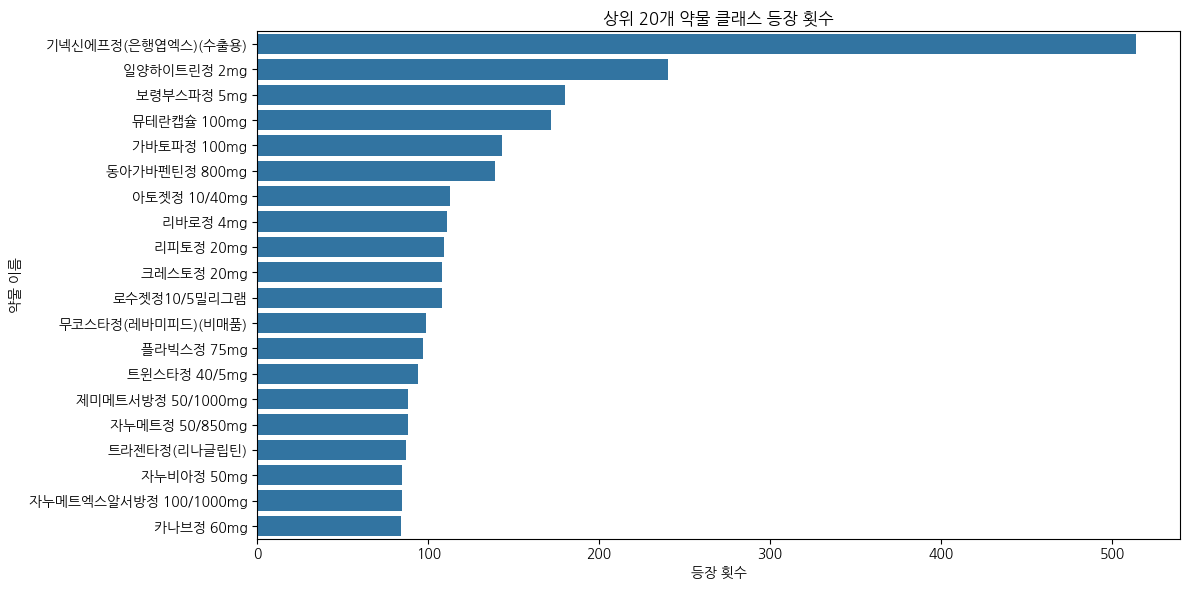

In [ ]:
df_anno_with_class = df_annotations.merge(df_categories, left_on="category_id", right_on="id", suffixes=('', '_cat'))
class_counts = df_anno_with_class['name'].value_counts().reset_index()
class_counts.columns = ['약물 이름', '등장 횟수']
plt.figure(figsize=(12,6))
sns.barplot(data=class_counts.head(20), x='등장 횟수', y='약물 이름')
plt.title('상위 20개 약물 클래스 등장 횟수')
plt.tight_layout()
plt.show()

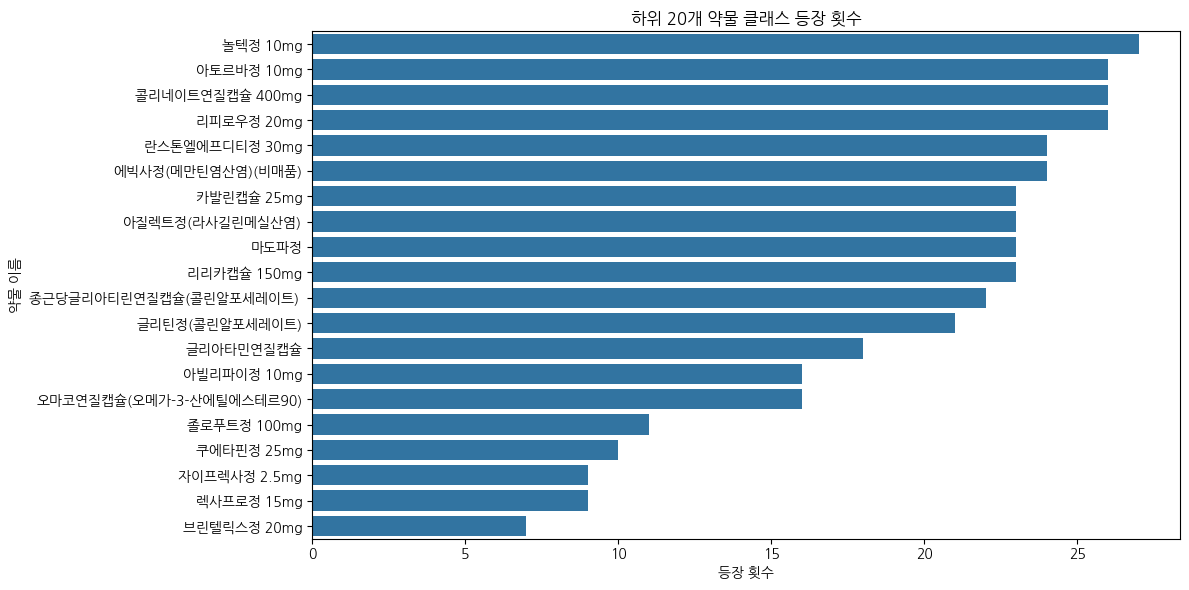

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=class_counts.tail(20), x='등장 횟수', y='약물 이름')
plt.title('하위 20개 약물 클래스 등장 횟수')
plt.tight_layout()
plt.show()

## **이미지 해상도 분포**
- 모든 이미지의 해상도가 976×1280으로 동일

In [ ]:
img_res = df_images.groupby(['width', 'height']).size().reset_index(name='count')
print("이미지 해상도 분포:")
print(img_res)

이미지 해상도 분포:
   width  height  count
0    976    1280   4526


## **색상 및 모양 분포**
- **하양(White) 색상**이 압도적으로 많으며 **1,200개 이상**으로 전체 데이터에서 가장 큰 비중을 차지
- 색상 분포의 불균형이 크기 때문에, 색상에 민감한 모델이라면 자주 등장하지 않는 색상 클래스에 대한 분류 성능 저하가 우려됨

- 비주류 색상 클래스에 대한 Oversampling, 또는 Class Weighting 적용 고려

- 전체적으로 모양 분포는 색상보다 고른 편이지만, 여전히 일부 모양에 편중됨

- 팔각형, 기타 등은 분류 성능이 낮을 수 있을 것으로 보임

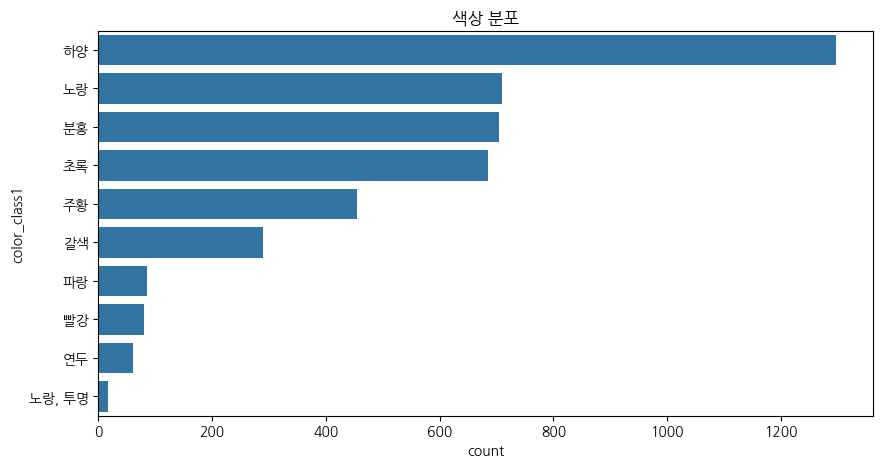

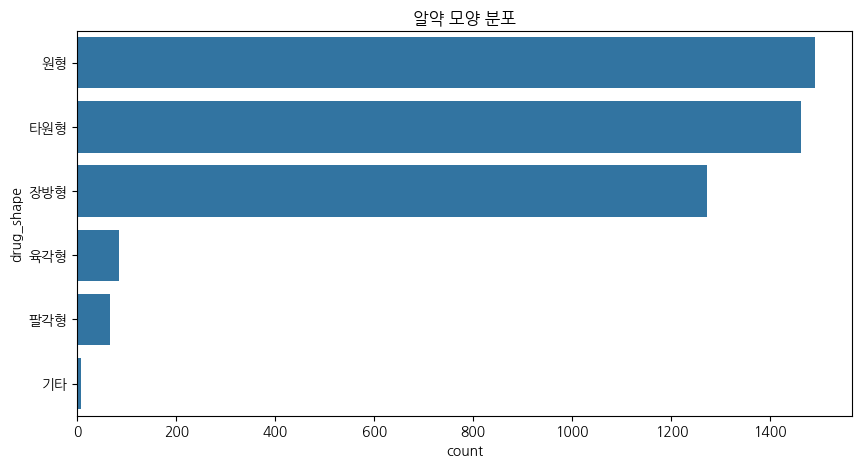

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='color_class1', data=df_images, order=df_images['color_class1'].value_counts().index)
plt.title("색상 분포")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='drug_shape', data=df_images, order=df_images['drug_shape'].value_counts().index)
plt.title("알약 모양 분포")
plt.show()

### **노랑(투명) 알약 샘플 시각화**

In [ ]:
from PIL import Image

def show_one_image(df, image_dir, title=''):
    if len(df) == 0:
        print("이미지가 없습니다.")
        return

    row = df.sample(1).iloc[0]
    file_path = os.path.join(image_dir, row['file_name'])

    try:
        img = Image.open(file_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"{title}\n{row['file_name']}", fontsize=12)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"파일 열기 실패: {file_path}, 에러: {e}")

In [ ]:
# 오마코연질캡슐(오메가-3-산에틸에스테르90)
df_images[df_images['color_class1'] == '노랑, 투명'].shape

(16, 51)

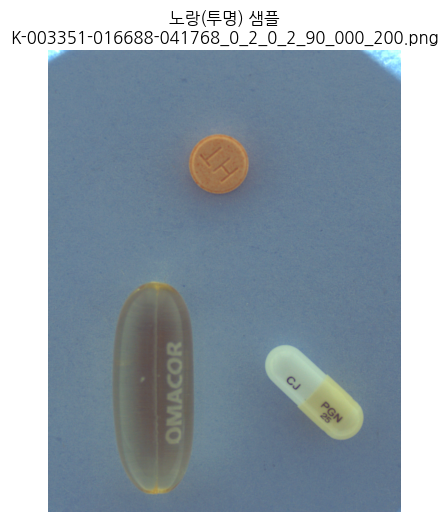

In [ ]:
yellow_transparent_samples = df_images[df_images['color_class1'] == '노랑, 투명']
show_one_image(yellow_transparent_samples, image_dir=train_image_dir, title='노랑(투명) 샘플')

### **기타(모양) 알약 샘플 시각화**

In [ ]:
# 브린텔릭스정 20mg
df_images[df_images['drug_shape'] == '기타'].shape

(7, 51)

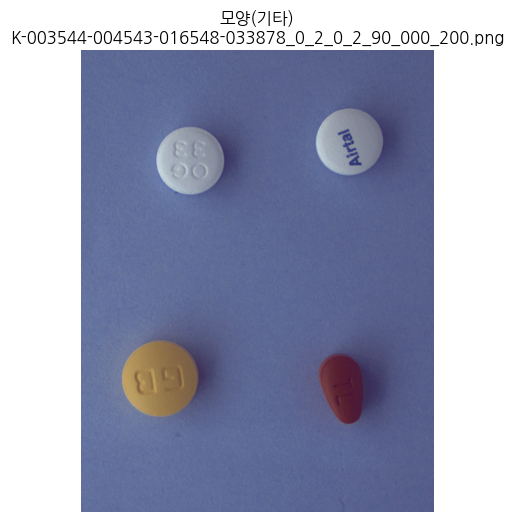

In [ ]:
# 물방울 모양 알약
others_samples = df_images[df_images['drug_shape'] == '기타']
show_one_image(others_samples, image_dir=train_image_dir, title='모양(기타)')

### **식별 문구 분석(OCR 가능성)**

In [ ]:
# 둘 다 결측치인 경우
no_print_both_nan = df_images[df_images['print_front'].isna() & df_images['print_back'].isna()]
# 둘 다 빈 문자열인 경우
no_print_both_empty = df_images[(df_images['print_front'] == '') & (df_images['print_back'] == '')]

print(f"둘 다 결측치인 경우 개수: {len(no_print_both_nan)}")
print(f"둘 다 빈 문자열인 경우 개수: {len(no_print_both_empty)}")

둘 다 결측치인 경우 개수: 143
둘 다 빈 문자열인 경우 개수: 0


In [ ]:
print_front_top = df_images['print_front'].value_counts().head(10)
print(print_front_top)

print_back_top = df_images['print_back'].value_counts().head(10)
print(print_back_top)

print_front
SK               549
마크               479
I분할선Y            240
BSP              180
YH               173
Hanwha MUC100    172
DGTH             139
337              113
마크203            111
ATV              109
Name: count, dtype: int64
print_back
        1662
G40      514
분할선      310
HT       240
5        180
20       142
800      139
1171      97
5010      88
D5        87
Name: count, dtype: int64


## **알약 실제 크기 분석**

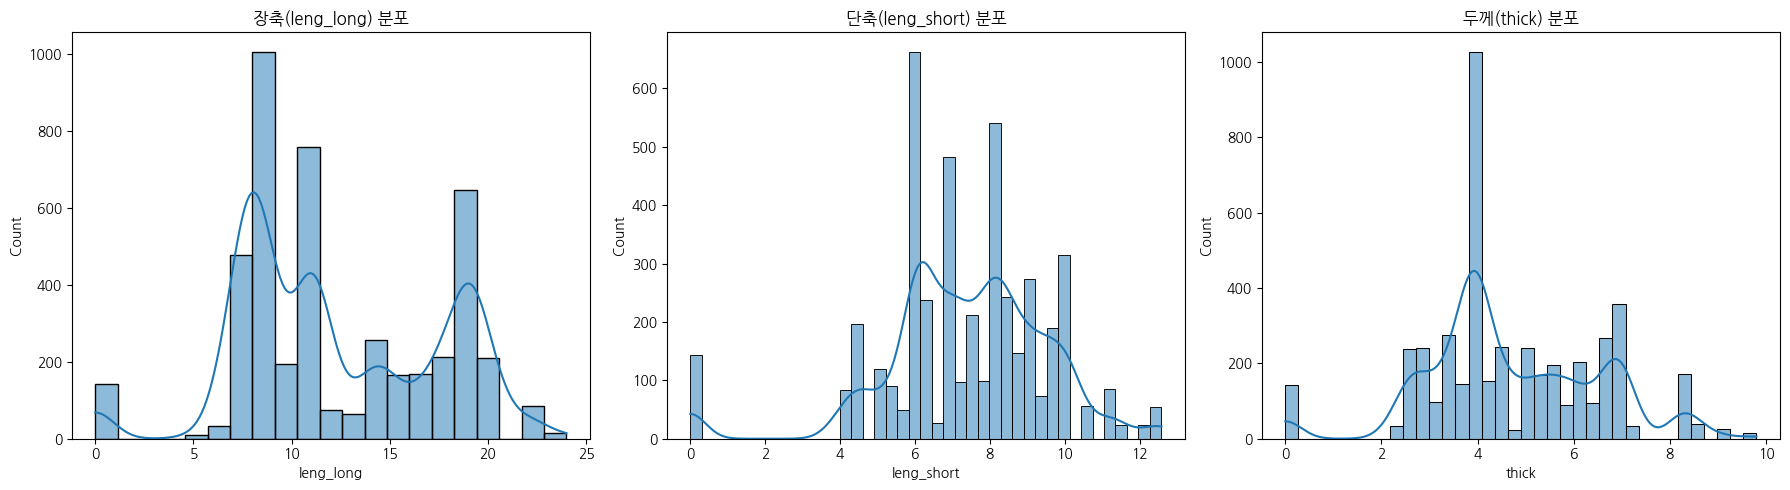

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_images['leng_long'], ax=axes[0], kde=True)
axes[0].set_title("장축(leng_long) 분포")
sns.histplot(df_images['leng_short'], ax=axes[1], kde=True)
axes[1].set_title("단축(leng_short) 분포")
sns.histplot(df_images['thick'], ax=axes[2], kde=True)
axes[2].set_title("두께(thick) 분포")
plt.tight_layout()
plt.show()

## **조명 색상 분포**
**데이터상 전부 `주백색`으로 라벨링**되어 있으나, 실제 이미지에서는 조도나 색감 차이로 인해 백색, 황백색처럼 보이는 경우도 있음


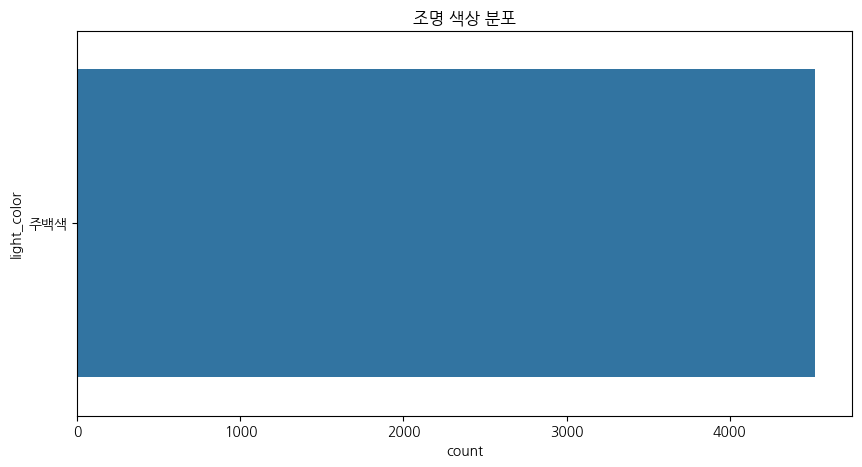

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='light_color', data=df_images, order=df_images['light_color'].value_counts().index)
plt.title("조명 색상 분포")
plt.show()

## **촬영 각도 분포**
- 각 알약은 **70°, 75°, 90°**의 세 가지 각도에서 촬영됨

- 촬영 각도에 따라 이미지에서 보이는 알약의 형태가 달라짐:

 - 90°: 정면 촬영으로, 알약의 두께면이 거의 보이지 않음

 - 75°, 70°: 경사 촬영으로, 각도가 낮아질수록 알약의 두께면이 더 잘 드러남

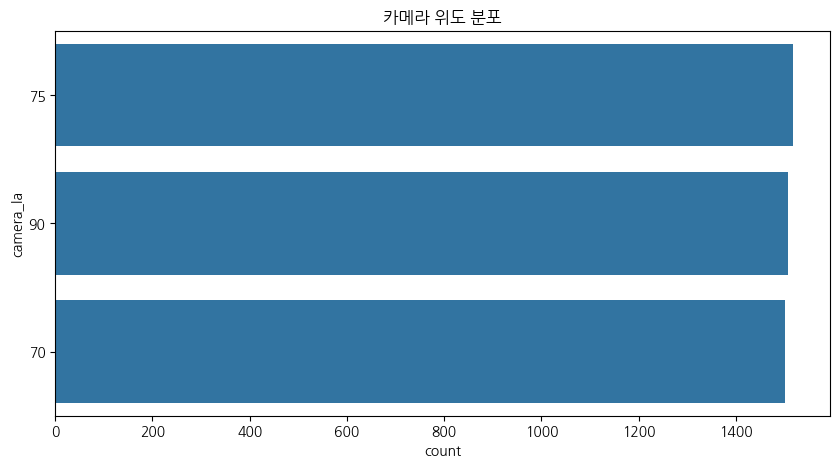

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='camera_la', data=df_images, order=df_images['camera_la'].value_counts().index)
plt.title("카메라 위도 분포")
plt.show()

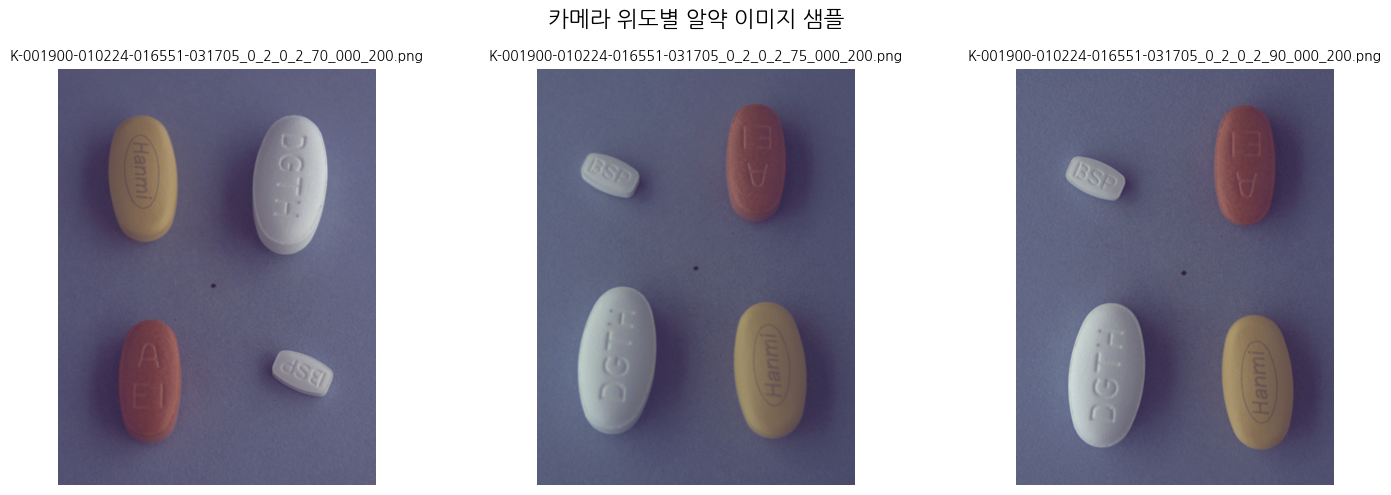

In [ ]:
def show_specific_images(image_filenames, image_dir, title=''):
    plt.figure(figsize=(15, 5))
    for i, file_name in enumerate(image_filenames):
        file_path = os.path.join(image_dir, file_name)
        try:
            img = Image.open(file_path)
            plt.subplot(1, len(image_filenames), i+1)
            plt.imshow(img)
            plt.title(file_name, fontsize=10)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

image_list = [
    "K-001900-010224-016551-031705_0_2_0_2_70_000_200.png",
    "K-001900-010224-016551-031705_0_2_0_2_75_000_200.png",
    "K-001900-010224-016551-031705_0_2_0_2_90_000_200.png"
]

show_specific_images(image_list, train_image_dir, title="카메라 위도별 알약 이미지 샘플")

## **이미지 배경 분포**
**데이터상 전부 `연회색`으로 라벨링** 되어 있으나, 일부 `하양`/`청록색` 등으로 육안상 다르게 보이는 이미지도 존재

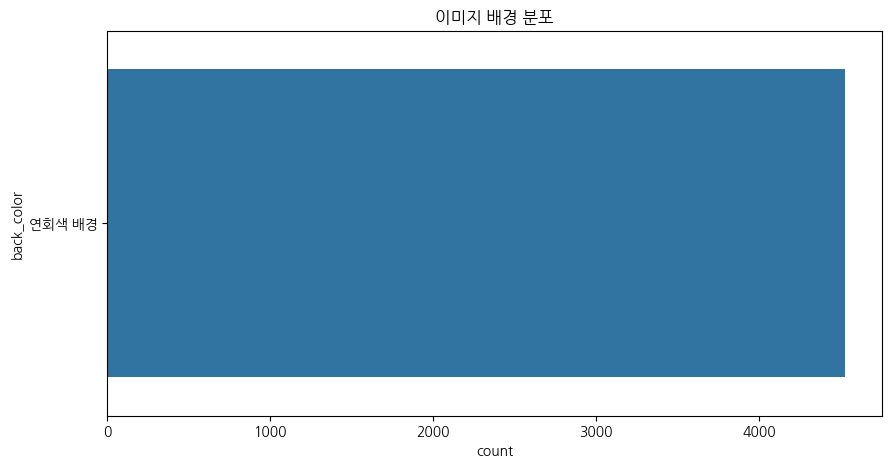

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='back_color', data=df_images, order=df_images['back_color'].value_counts().index)
plt.title("이미지 배경 분포")
plt.show()

## **바운딩 박스 통계**

        bbox_width  bbox_height      bbox_area
count  4526.000000  4526.000000    4526.000000
mean    259.326558   288.745913   78884.169244
std      70.032392   116.951857   47201.727592
min     125.000000   123.000000   18492.000000
25%     209.000000   199.000000   43397.000000
50%     242.000000   231.000000   57452.000000
75%     295.000000   403.000000  106294.750000
max     529.000000   669.000000  272435.000000


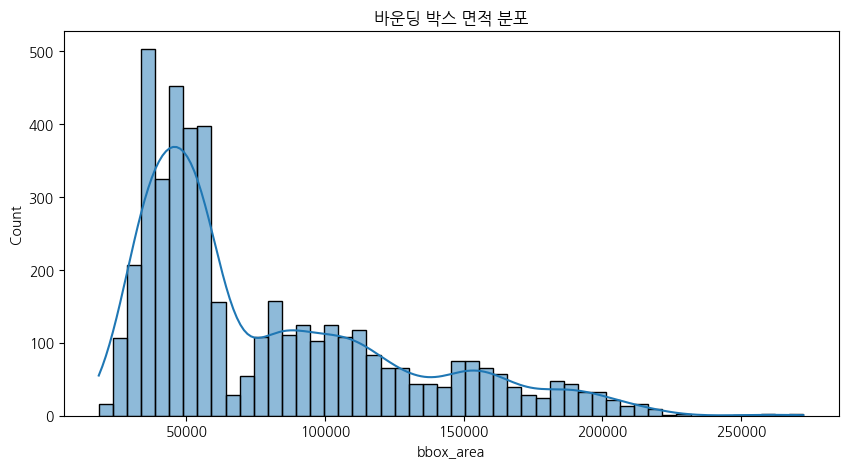

In [ ]:
df_annotations['bbox_width'] = df_annotations['bbox'].apply(lambda x: x[2])
df_annotations['bbox_height'] = df_annotations['bbox'].apply(lambda x: x[3])
df_annotations['bbox_area'] = df_annotations['bbox_width'] * df_annotations['bbox_height']
print(df_annotations[['bbox_width', 'bbox_height', 'bbox_area']].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_annotations['bbox_area'], bins=50, kde=True)
plt.title("바운딩 박스 면적 분포")
plt.show()

count    14802.000000
mean         0.063543
std          0.037835
min          0.014802
25%          0.035288
50%          0.046109
75%          0.085292
max          0.218074
Name: bbox_ratio, dtype: float64


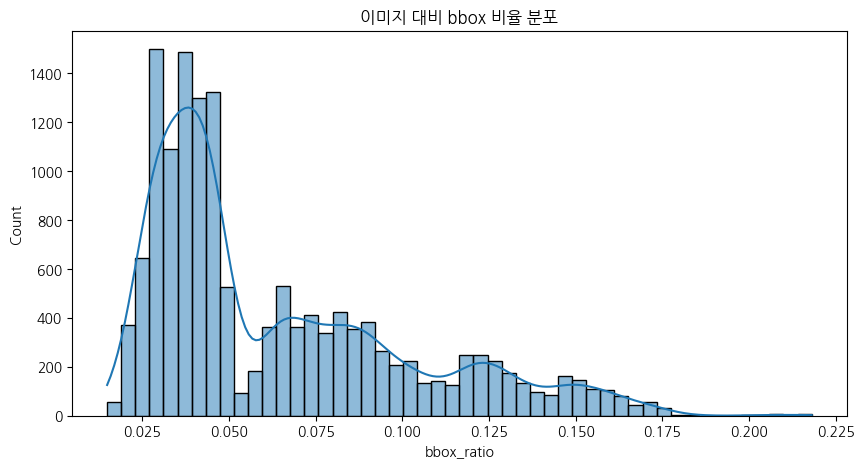

In [ ]:
df_merged = df_annotations.merge(df_images, left_on='image_id', right_on='id', suffixes=('_anno', '_img'))
df_merged['img_area'] = df_merged['width'] * df_merged['height']
df_merged['bbox_ratio'] = df_merged['bbox_area'] / df_merged['img_area']
print(df_merged['bbox_ratio'].describe())

plt.figure(figsize=(10,5))
sns.histplot(df_merged['bbox_ratio'], bins=50, kde=True)
plt.title("이미지 대비 bbox 비율 분포")
plt.show()

## **결측치 분석**
- 총 143건의 결측치가 존재하며, 모두 동일한 알약 (**가바토파정 100mg**)에 해당

- 결측 필드에는 **알약 외형 정보(color_class, drug_shape 등)**와
각인(mark), 정제 분류명(form_code_name) 정보 등 메타데이터가 포함됨

→ 육안으로 확인 가능한 정보(예: 알약의 모양, 색상, 각인)는 필요시 수기로 보완하거나 식약처 등 공식 데이터를 참고하여 보완 가능

In [ ]:
missing = df_images.isnull().sum().sort_values(ascending=False)
print("누락값 분포:")
print(missing[missing > 0])

누락값 분포:
img_key                 143
print_front             143
change_date             143
print_back              143
color_class1            143
color_class2            143
line_front              143
line_back               143
img_regist_ts           143
form_code_name          143
mark_code_front_anal    143
mark_code_back_anal     143
mark_code_front_img     143
mark_code_back_img      143
mark_code_front         143
mark_code_back          143
drug_shape              143
chart                   143
dtype: int64


In [ ]:
missing_df = df_images[df_images.isnull().any(axis=1)]
missing_df

file_name  width  height  \
67    K-001900-016548-027926-033208_0_2_0_2_75_000_2...    976    1280   
68    K-001900-016548-027926-033208_0_2_0_2_90_000_2...    976    1280   
69    K-001900-016548-027926-033208_0_2_0_2_70_000_2...    976    1280   
151   K-003544-010221-016548-031705_0_2_0_2_75_000_2...    976    1280   
152   K-003544-010221-016548-031705_0_2_0_2_90_000_2...    976    1280   
...                                                 ...    ...     ...   
4073  K-003544-004543-016548-029871_0_2_0_2_75_000_2...    976    1280   
4074  K-003544-004543-016548-029871_0_2_0_2_90_000_2...    976    1280   
4125  K-001900-016548-031705-033208_0_2_0_2_70_000_2...    976    1280   
4126  K-001900-016548-031705-033208_0_2_0_2_90_000_2...    976    1280   
4280  K-001900-016548-029451-033208_0_2_0_2_75_000_2...    976    1280   

                                                imgfile    drug_N drug_S  \
67    K-001900-016548-027926-033208_0_2_0_2_75_000_2...  K-016548   정상알약   
68    K-001900-016548-027926-033208_0_2_0_2_90_000_2...  K-016548   정상알약   
69    K-001900-016548-027926-033208_0_2_0_2_70_000_2...  K-016548   정상알약   
151   K-003544-010221-016548-031705_0_2_0_2_75_000_2...  K-016548   정상알약   
152   K-003544-010221-016548-031705_0_2_0_2_90_000_2...  K-016548   정상알약   
...                                                 ...       ...    ...   
4073  K-003544-004543-016548-029871_0_2_0_2_75_000_2...  K-016548   정상알약   
4074  K-003544-004543-016548-029871_0_2_0_2_90_000_2...  K-016548   정상알약   
4125  K-001900-016548-031705-033208_0_2_0_2_70_000_2...  K-016548   정상알약   
4126  K-001900-016548-031705-033208_0_2_0_2_90_000_2...  K-016548   정상알약   
4280  K-001900-016548-029451-033208_0_2_0_2_75_000_2...  K-016548   정상알약   

     back_color drug_dir light_color  camera_la  camera_lo  size dl_idx  \
67       연회색 배경       앞면         주백색         75          0   200  16547   
68       연회색 배경       앞면         주백색         90          0   200  16547   
69       연회색 배경       앞면         주백색         70          0   200  16547   
151      연회색 배경       앞면         주백색         75          0   200  16547   
152      연회색 배경       앞면         주백색         90          0   200  16547   
...         ...      ...         ...        ...        ...   ...    ...   
4073     연회색 배경       앞면         주백색         75          0   200  16547   
4074     연회색 배경       앞면         주백색         90          0   200  16547   
4125     연회색 배경       앞면         주백색         70          0   200  16547   
4126     연회색 배경       앞면         주백색         90          0   200  16547   
4280     연회색 배경       앞면         주백색         75          0   200  16547   

     dl_mapping_code      dl_name           dl_name_en img_key dl_material  \
67          K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
68          K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
69          K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
151         K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
152         K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
...              ...          ...                  ...     ...         ...   
4073        K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
4074        K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
4125        K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
4126        K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   
4280        K-016548  가바토파정 100mg  Gabatopa Tab. 100mg    None      토피라메이트   

     dl_material_en dl_custom_shape dl_company dl_company_en di_company_mf  \
67       Topiramate         정제, 저작정   동아에스티(주)     Dong-A St                 
68       Topiramate         정제, 저작정   동아에스티(주)     Dong-A St                 
69       Topiramate         정제, 저작정   동아에스티(주)     Dong-A St                 
151      Topiramate         정제, 저작정   동아에스티(주)     Dong-A St                 
152      Topiram

In [ ]:
missing_df['dl_name'].unique()

array(['가바토파정 100mg'], dtype=object)

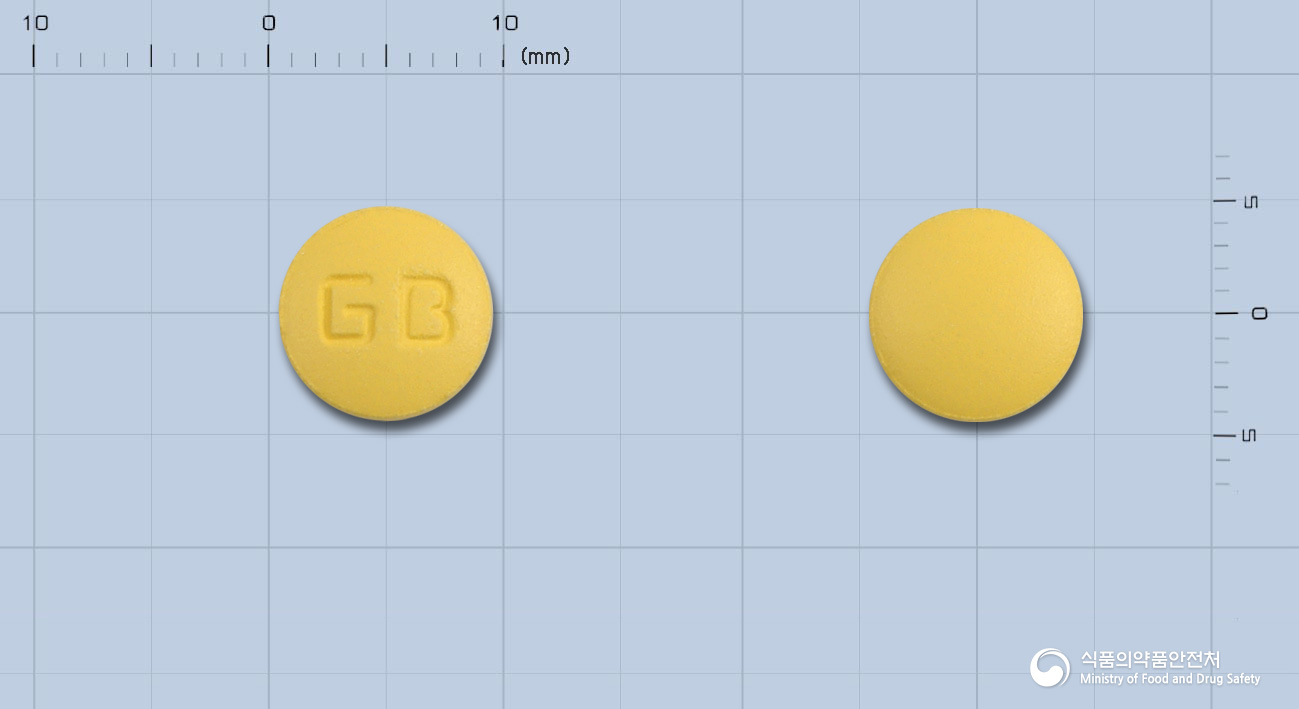

## **이미지 + 바운딩 박스 시각화**
바운딩 박스가 누락된 알약들이 관찰됨. 추후 바운딩 박스 추가 혹은 추가 데이터 확보가 필요해 보임

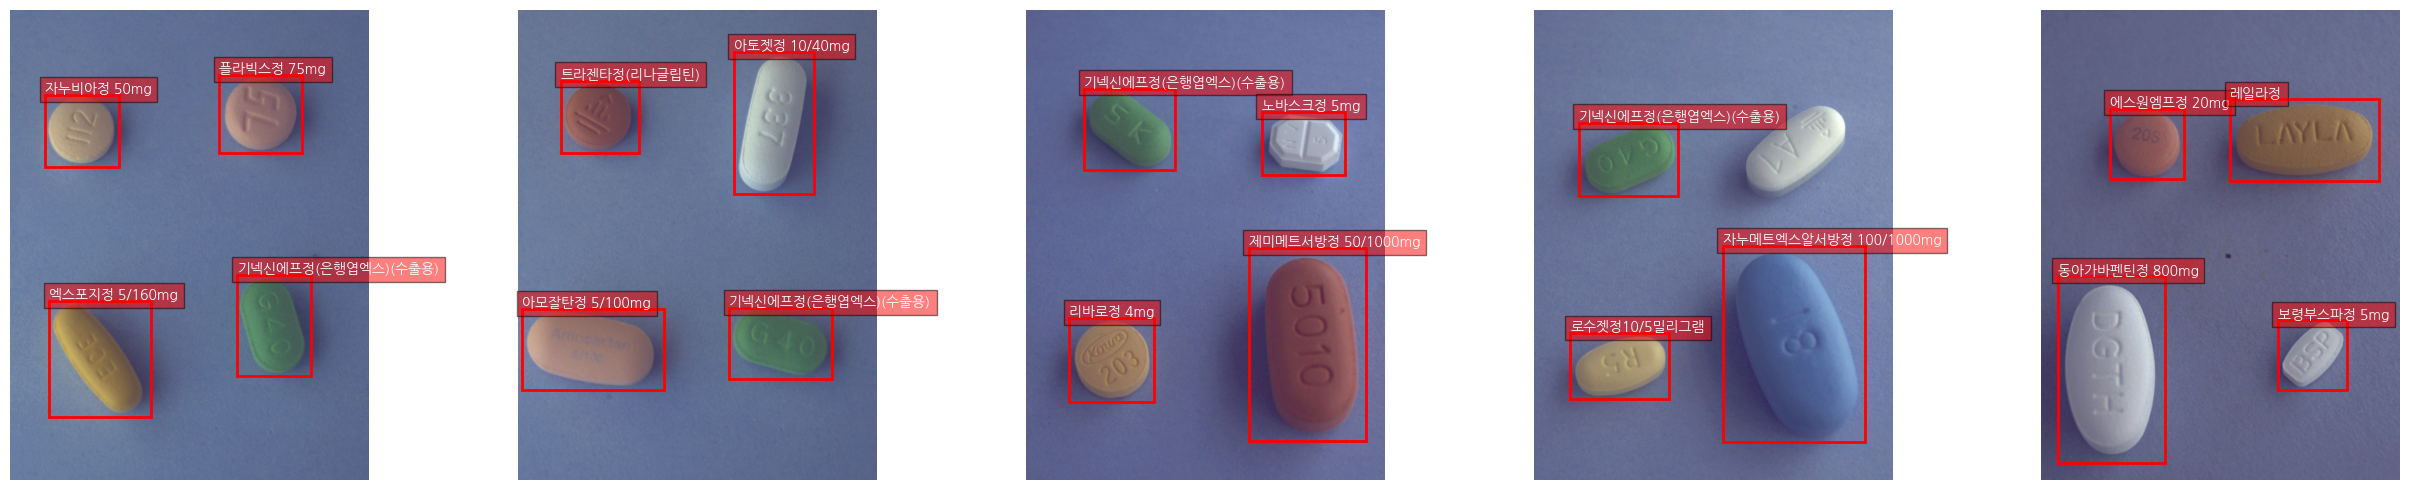

In [ ]:
def convert_bbox_coco_to_xyxy(bbox):
    x, y, w, h = bbox
    return [x, y, x + w, y + h]

def visualize_bboxes_on_ax(ax, image_path, bboxes):
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')

    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
        class_name = bbox['class']

        rect = patches.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, class_name, color='white', fontsize=10,
                bbox=dict(facecolor='red', alpha=0.5))

def visualize_random_samples(num_samples=4):
    samples = df_images.sample(num_samples)

    fig, axs = plt.subplots(1, num_samples, figsize=(5 * num_samples, 5))

    if num_samples == 1:
        axs = [axs]

    for ax, (_, image_info) in zip(axs, samples.iterrows()):
        image_id = image_info['id']
        image_path = os.path.join(train_image_dir, image_info['file_name'])

        bboxes_for_image = []
        anns = df_annotations[df_annotations['image_id'] == image_id]
        for _, row in anns.iterrows():
            xmin, ymin, xmax, ymax = convert_bbox_coco_to_xyxy(row['bbox'])
            category_id = row['category_id']
            class_name = df_categories[df_categories['id'] == category_id]['name'].values[0]

            bboxes_for_image.append({
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax,
                'class': class_name
            })

        visualize_bboxes_on_ax(ax, image_path, bboxes_for_image)

    plt.tight_layout()
    plt.show()

# 5개 이미지 랜덤 시각화
visualize_random_samples(num_samples=5)


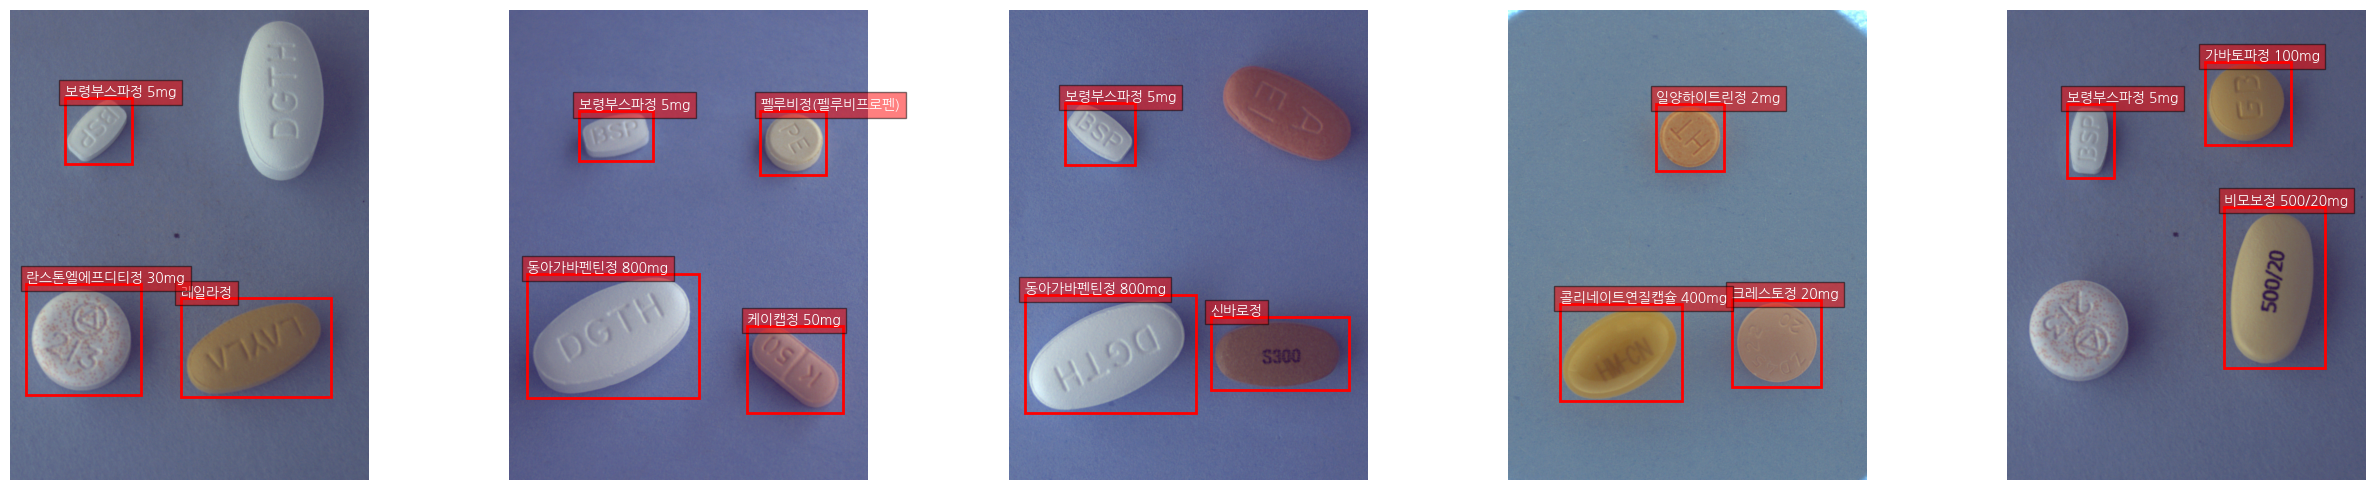

In [ ]:
visualize_random_samples(num_samples=5)

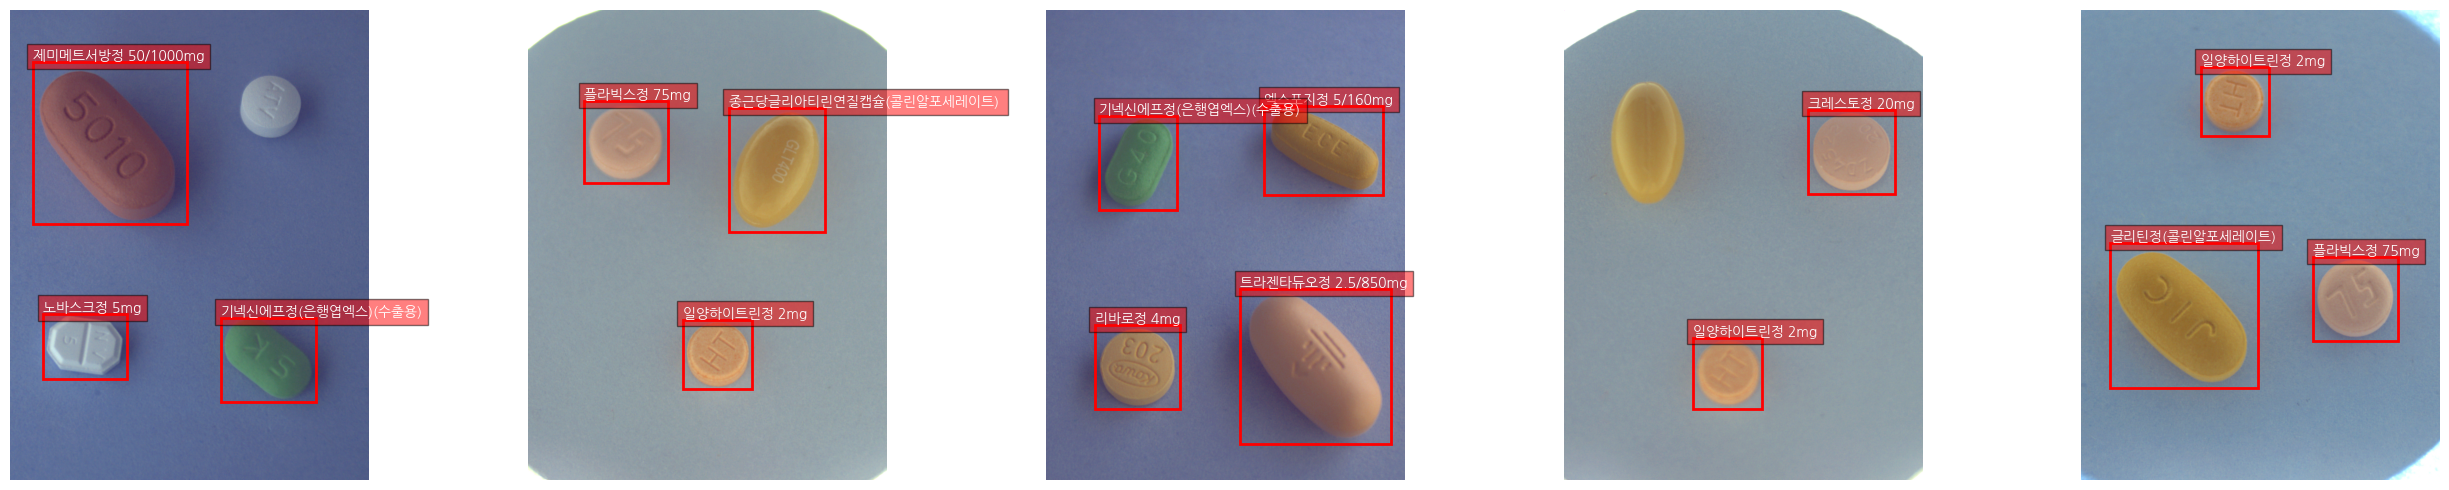

In [ ]:
visualize_random_samples(num_samples=5)